In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
df = pd.read_csv("./additional/AirlineQualityRatings.csv")

In [27]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [75]:
# Преобразование столбца 'region' в числовой формат
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Customer Type'] = df['Customer Type'].astype('category').cat.codes
df['Type of Travel'] = df['Type of Travel'].astype('category').cat.codes
df['Class'] = df['Class'].astype('category').cat.codes
# df['Satisfaction5'] = df['Satisfaction']
Y_sat = df['Satisfaction']
df['Satisfaction'] = df['Satisfaction'].astype('category').cat.codes

In [30]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,1,28,1,1,2,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,0
129876,129877,1,41,1,1,2,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,0
129877,129878,1,42,1,1,2,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,0
129878,129879,1,50,1,1,2,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,1


In [31]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace = True)

C:\Users\gorod\AppData\Local\Temp\ipykernel_10340\775785110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace = True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  int8   
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int8   
 4   Type of Travel                          129880 non-null  int8   
 5   Class                                   129880 non-null  int8   
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

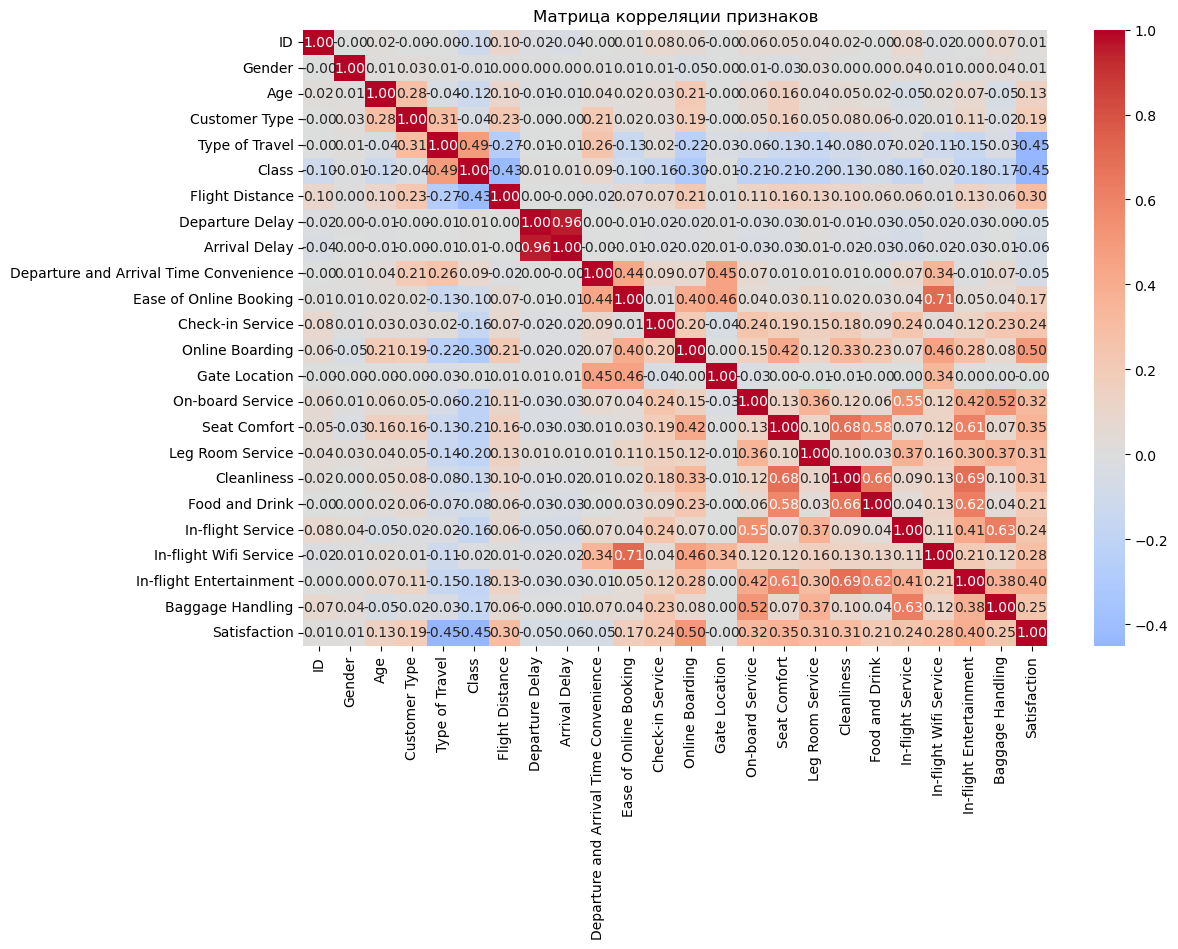

Satisfaction                              1.000000
Online Boarding                           0.501749
Type of Travel                           -0.449861
Class                                    -0.448193
In-flight Entertainment                   0.398234
Seat Comfort                              0.348829
On-board Service                          0.322205
Leg Room Service                          0.312424
Cleanliness                               0.307035
Flight Distance                           0.298085
In-flight Wifi Service                    0.283460
Baggage Handling                          0.248680
In-flight Service                         0.244918
Check-in Service                          0.237252
Food and Drink                            0.211340
Customer Type                             0.186017
Ease of Online Booking                    0.168877
Age                                       0.134091
Arrival Delay                            -0.058145
Departure and Arrival Time Conv

In [33]:
corr_matrix = df.corr() # расчёт корреляции
target_corr = corr_matrix['Satisfaction'].sort_values(ascending=False)
# Отсортируем признаки по модулю корреляции с целевой переменной:

# визуализация с seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Матрица корреляции признаков')
plt.show()

target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

In [34]:
# Уникальные значения в 'region'
unique_regions = df['Class'].unique()
f"{len(unique_regions)}: {unique_regions}"

'3: [0 1 2]'

In [69]:
# Уникальные значения в 'region'
unique_regions = df['Satisfaction'].unique()
f"{len(unique_regions)}: {unique_regions}"

'2: [0 1]'

In [35]:
X = df.drop('Satisfaction', axis=1).values
Y = df['Satisfaction'].values
Y_log = Y
# сразу нормализуем наши значения
scaler = StandardScaler() # z-score нормализация
X_scaled = scaler.fit_transform(X)
#Y_log = np.log1p(Y)

In [36]:
# разобьём на тренировочный и тестовый сеты данных
indices = list(range(len(X_scaled)))
random.shuffle(indices)
split = int(0.8 * len(X_scaled))
train_idx = indices[:split]
test_idx = indices[split:]

X_train = X_scaled[train_idx]
Y_train = Y_log[train_idx].reshape(-1, 1)
X_test = X_scaled[test_idx]
Y_test = Y_log[test_idx].reshape(-1, 1)

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, Y_train.ravel(), cv=5,
        scoring='neg_mean_absolute_error',
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Train MAE')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Test MAE')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error


model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)

y_pred = model.predict(X_train)
y_pred_proba = model.predict_proba(X_train)[:, 1]

acc = accuracy_score(Y_train, y_pred)
mse = mean_squared_error(Y_train, y_pred_proba)

print(f"Train Accuracy (sklearn): {acc:.4f}")
print(f"Train MSE (sklearn): {mse:.4f}")

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred_proba)
mae = mean_absolute_error(Y_test, y_pred)

print(f"Test Accuracy (sklearn): {acc:.4f}")
print(f"Test MSE (sklearn): {mse:.4f}")
print(f" MAE: {mae:.4f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy (sklearn): 0.8753
Train MSE (sklearn): 0.0957
Test Accuracy (sklearn): 0.8749
Test MSE (sklearn): 0.0967
 MAE: 0.1251


In [39]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# Обучение модели
rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(random_state=42)

In [41]:
# Предсказания
Y_pred_rf = rf_model.predict(X_test)

In [42]:
# Метрики
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)

acc_rf = accuracy_score(Y_test, y_pred)

print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")
f"Random Forest Accuracy: {acc_rf:.4f}"

Random Forest MAE: 0.0375
Random Forest MSE: 0.0375


'Random Forest Accuracy: 0.8749'

In [43]:
# ДЕРЕВО РЕШЕНИЙ
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели
tree_model = DecisionTreeClassifier(random_state=42)

# Обучение модели
tree_model.fit(X_train, Y_train.ravel())

# Предсказания
Y_pred_tree = tree_model.predict(X_test)

# Метрики
mae_tree = mean_absolute_error(Y_test, Y_pred_tree)
mse_tree = mean_squared_error(Y_test, Y_pred_tree)

print(f"Decision Tree MAE: {mae_tree:.4f}")
print(f"Decision Tree MSE: {mse_tree:.4f}")
accuracy_tree =  accuracy_score(Y_test, Y_pred_tree)
f"Decision Tree Accuracy ({accuracy_tree:.4f})"

Decision Tree MAE: 0.0546
Decision Tree MSE: 0.0546


'Decision Tree Accuracy (0.9454)'

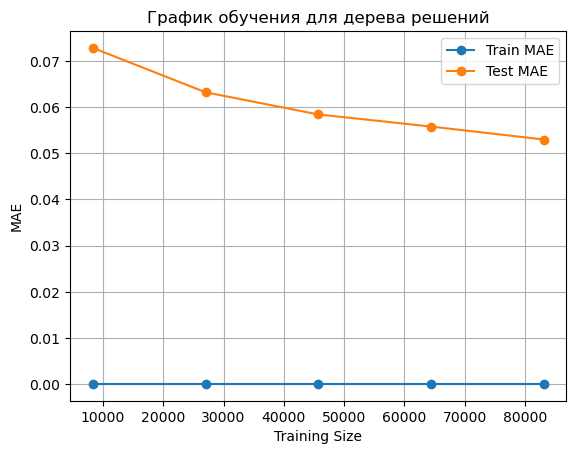

In [44]:
plot_learning_curve(tree_model, "График обучения для дерева решений")

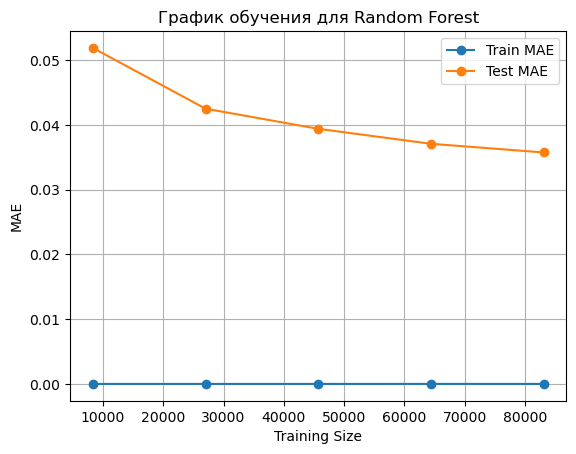

In [45]:
plot_learning_curve(rf_model, "График обучения для Random Forest")

In [46]:
# GRADIENT BOOSTING 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# Инициализация модели
gb_model = GradientBoostingClassifier(
    n_estimators=200,       # количество деревьев
    learning_rate=0.1,      
    max_depth=4,            # max глубина каждого дерева
    random_state=42
)

# Обучение модели
gb_model.fit(X_train, Y_train.ravel())

# Предсказания
Y_pred_gb = gb_model.predict(X_test)

# Метрики
mae_gb = mean_absolute_error(Y_test, Y_pred_gb)
mse_gb = mean_squared_error(Y_test, Y_pred_gb)


print(f"Gradient Boosting MAE: {mae_gb:.4f}")
print(f"Gradient Boosting MSE: {mse_gb:.4f}")
accuracy_gb =  accuracy_score(Y_test, Y_pred_tree)
f"Decision Tree Accuracy ({accuracy_gb:.4f})"


Gradient Boosting MAE: 0.0429
Gradient Boosting MSE: 0.0429


'Decision Tree Accuracy (0.9454)'

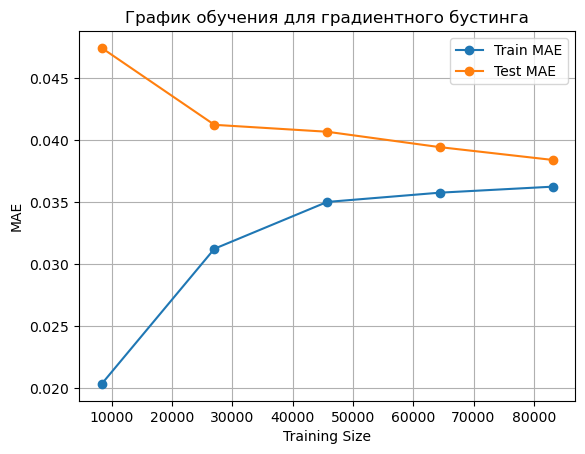

In [47]:
plot_learning_curve(gb_model, "График обучения для градиентного бустинга")

In [48]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Инициализация модели
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Обучение модели
xgb_model.fit(X_train, Y_train.ravel())

# Предсказания
Y_pred_xgb = xgb_model.predict(X_test)

# Метрики
mae_xgb = mean_absolute_error(Y_test, Y_pred_xgb)
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}")
accuracy_gx =  accuracy_score(Y_test, Y_pred_tree)
f"Decision Tree Accuracy ({accuracy_gx:.4f})"

XGBoost MAE: 0.0408
XGBoost MSE: 0.0408


'Decision Tree Accuracy (0.9454)'

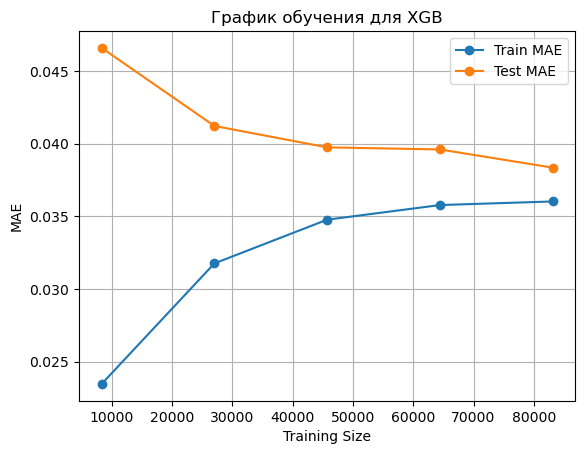

In [49]:
plot_learning_curve(xgb_model, "График обучения для XGB")

In [51]:
# CATBOOST
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Инициализация модели
cat_model = CatBoostClassifier(
    iterations=500,        
    learning_rate=0.05,     
    verbose=0,            
    random_state=42
)

# Обучение модели
cat_model.fit(X_train, Y_train.ravel())

# Предсказания
Y_pred_cat = cat_model.predict(X_test)

# Метрики
mae_cat = mean_absolute_error(Y_test, Y_pred_cat)
mse_cat = mean_squared_error(Y_test, Y_pred_cat)


print(f"CatBoost MAE: {mae_cat:.4f}")
print(f"CatBoost MSE: {mse_cat:.4f}")
accuracy_cat =  accuracy_score(Y_test, Y_pred_tree)
f"Decision Tree Accuracy ({accuracy_cat:.4f})"

CatBoost MAE: 0.0364
CatBoost MSE: 0.0364


'Decision Tree Accuracy (0.9454)'

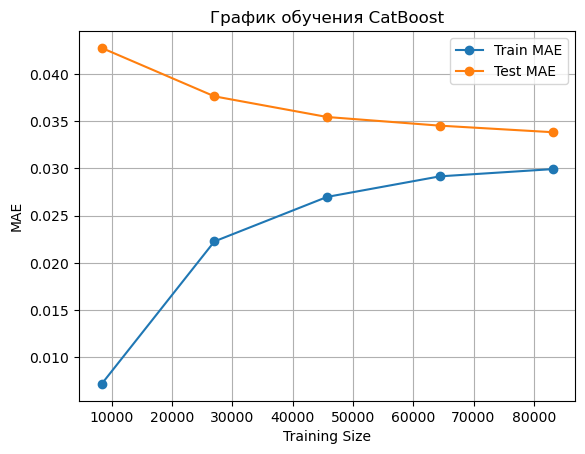

In [52]:
plot_learning_curve(cat_model, "График обучения CatBoost")

In [53]:
# LightGBM
import lightgbm as lgb

# Инициализация модели
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose = 0
)

# Обучение модели
lgb_model.fit(X_train, Y_train.ravel())

# Предсказания
Y_pred_lgb = lgb_model.predict(X_test)

# Метрики
mae_lgb = mean_absolute_error(Y_test, Y_pred_lgb)
mse_lgb = mean_squared_error(Y_test, Y_pred_lgb)


print(f"LightGBM MAE: {mae_lgb:.4f}")
print(f"LightGBM MSE: {mse_lgb:.4f}")
accuracy_lig =  accuracy_score(Y_test, Y_pred_tree)
f"Decision Tree Accuracy ({accuracy_lig:.4f})"

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM MAE: 0.0885
LightGBM MSE: 0.0333


'Decision Tree Accuracy (0.9454)'

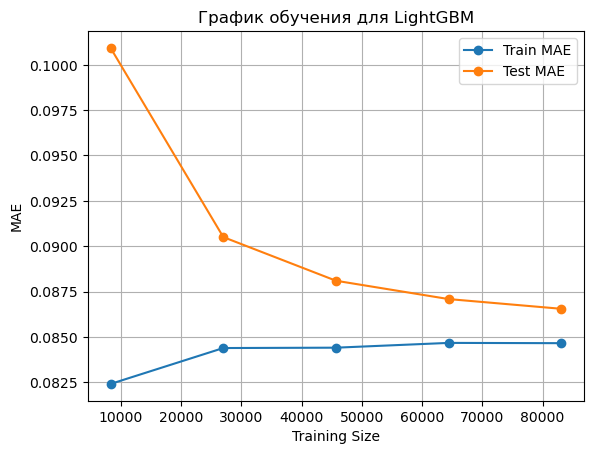

In [54]:
plot_learning_curve(lgb_model, "График обучения для LightGBM")

In [55]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM'],
    'MAE': [mae, mae_rf, mae_tree, mae_gb, mae_xgb, mae_cat, mae_lgb],
    'MSE': [mse, mse_rf, mse_tree, mse_gb, mse_xgb, mse_cat, mse_lgb],
    'Accuracy': [acc,  acc_rf, accuracy_tree, accuracy_gb, accuracy_gx, accuracy_cat, accuracy_lig]})

print(results.sort_values(by='Accuracy'))

                 Model       MAE       MSE  Accuracy
0  Logistic Regression  0.125115  0.096698  0.874885
1        Random Forest  0.037458  0.037458  0.874885
2        Decision Tree  0.054627  0.054627  0.945373
3    Gradient Boosting  0.042886  0.042886  0.945373
4              XGBoost  0.040807  0.040807  0.945373
5             CatBoost  0.036380  0.036380  0.945373
6             LightGBM  0.088544  0.033340  0.945373


Оценим важность фичей.

In [59]:
# Встроенная важность признаков Feature Importance.
# Чем больше признак уменьшает ошибку при разбиении, тем выше его важность.

from catboost import Pool

X_imp = df.drop("Satisfaction", axis=1)
Y_imp = df["Satisfaction"]

feature_importance = cat_model.get_feature_importance(Pool(X_imp, Y_imp))
importance_df = pd.DataFrame({
    "Feature": X_imp.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
4,Type of Travel,65.350524
20,In-flight Wifi Service,25.531482
7,Departure Delay,3.081014
8,Arrival Delay,2.176612
13,Gate Location,1.020350
12,Online Boarding,0.947952
10,Ease of Online Booking,0.942244
9,Departure and Arrival Time Convenience,0.836252
5,Class,0.072505
16,Leg Room Service,0.021146


In [60]:
# Перестановочная важность (значения признака перемешиваются случайным образом и смотрим, насколько ухудшилась модель)
# Permutation Importance
from sklearn.inspection import permutation_importance
result = permutation_importance(cat_model, X_imp, Y_imp)

<Axes: title={'center': 'Permutation Importance'}>

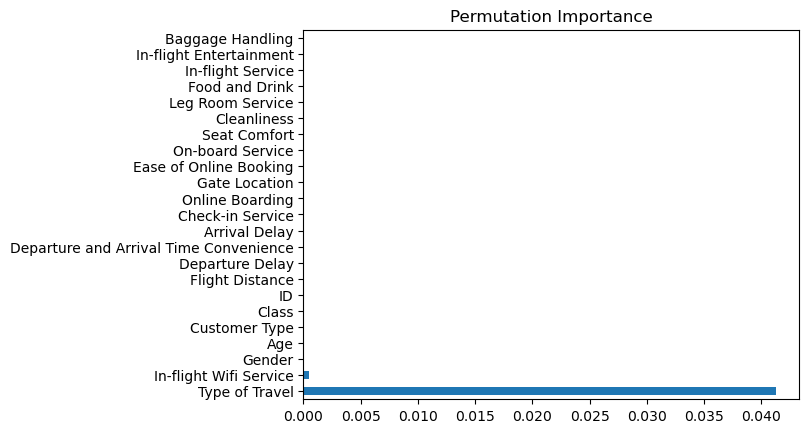

In [63]:
perm_importances = pd.Series(result.importances_mean, index=X_imp.columns)
perm_importances.sort_values(ascending=False).plot(kind="barh", title="Permutation Importance")

Будем опираться на результаты оценки первым методом, так как он более логично описывает закономерности.

In [85]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

important_features = [
    "Type of Travel",
    "In-flight Wifi Service",
    "Departure Delay",
    "Departure and Arrival Time Convenience",
    "Arrival Delay",
    "Gate Location",
    "Online Boarding",
    "Ease of Online Booking",
    "Class",
    "Leg Room Service"
]

# Предобработка
X_new = df[important_features]
Y_new = Y_sat.map({
    "Neutral or Dissatisfied": 2.0,
    "Satisfied": 4.0
})

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, random_state=42)
model = CatBoostRegressor(verbose=0)
model.fit(X_train, y_train)

df["Satisfaction_regressed"] = model.predict(X) # применяем модель ко всем признакам

# Нормализация в диапазон [1, 5]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
df["Satisfaction_scaled"] = scaler.fit_transform(df[["Satisfaction_regressed"]])

In [86]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction_regressed,Satisfaction_scaled
0,1,1,48,0,0,0,821,2,5.0,3,...,2,5,5,5,3,5,5,0,1.919930,1.281268
1,2,0,35,1,0,0,821,26,39.0,2,...,5,5,3,5,2,5,5,1,3.705842,4.190243
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,5,3,4,3,3,1,2.428784,2.110113
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,4,4,5,2,5,5,1,2.501193,2.228056
4,5,0,49,1,0,0,3470,0,1.0,3,...,4,5,4,3,3,3,3,1,4.007052,4.680868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,1,28,1,1,2,447,2,3.0,4,...,4,4,4,5,4,4,4,0,1.920143,1.281615
129876,129877,1,41,1,1,2,308,0,0.0,5,...,5,2,2,4,3,2,5,0,2.159463,1.671430
129877,129878,1,42,1,1,2,337,6,14.0,5,...,4,3,3,4,2,3,5,0,1.991606,1.398019
129878,129879,1,50,1,1,2,337,31,22.0,4,...,5,3,3,4,5,3,5,1,2.009391,1.426987


In [88]:
# LightGBM
import lightgbm as lgb

# Инициализация модели
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose = 0
)

# Обучение модели
lgb_model.fit(X_train, y_train.ravel())

# Предсказания
Y_pred_lgb = lgb_model.predict(X_test)

# Метрики
mae_lgb = mean_absolute_error(y_test, Y_pred_lgb)
mse_lgb = mean_squared_error(y_test, Y_pred_lgb)

# "Точность"
threshold = 0.2
accuracy_lgb = (abs(y_test - Y_pred_lgb) < threshold).mean()

print(f"LightGBM MAE: {mae_lgb:.4f}")
print(f"LightGBM MSE: {mse_lgb:.4f}")
f"LightGBM Accuracy (с порогом {threshold}): {accuracy_lgb:.4f}"

C:\Users\gorod\AppData\Local\Temp\ipykernel_10340\78121986.py:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lgb_model.fit(X_train, y_train.ravel())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM MAE: 0.2272
LightGBM MSE: 0.1959


'LightGBM Accuracy (с порогом 0.2): 0.7311'